# <b> Machine Learning Model to Predict the Overall Beer Ratings
    

### <b> Imports 

In [1]:
from utils.headers import *
import utils.functions as func
import seaborn as sea

### <b> Loading Data

In [2]:
data = pd.read_csv('utils/data/beers.csv')

In [3]:
copy = data.copy()

In [4]:
copy.head(2)

,review_id,beer_id,brewer_id,beer_name,beer_style,beer_abv,review_appearance,review_aroma,review_palate,review_taste,review_rating,review_text,review_user
0,44610,429,1,Pilsner Urquell,Czech Pilsener,4.4,3.0,3.0,3.0,3.0,2.5,First thing I noticed after pouring from green...,5803
1,37062,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.4,4.0,3.0,3.5,2.5,3.0,A: pours an amber with a one finger head but o...,535


In [5]:
data.shape

(25190, 13)

# <b> Informations About the Data

In [6]:
# First lines
data.head(2)

,review_id,beer_id,brewer_id,beer_name,beer_style,beer_abv,review_appearance,review_aroma,review_palate,review_taste,review_rating,review_text,review_user
0,44610,429,1,Pilsner Urquell,Czech Pilsener,4.4,3.0,3.0,3.0,3.0,2.5,First thing I noticed after pouring from green...,5803
1,37062,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.4,4.0,3.0,3.5,2.5,3.0,A: pours an amber with a one finger head but o...,535


In [7]:
# Last lines
data.tail(2)

,review_id,beer_id,brewer_id,beer_name,beer_style,beer_abv,review_appearance,review_aroma,review_palate,review_taste,review_rating,review_text,review_user
25188,33233,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,11.2,4.0,4.0,5.0,5.0,4.0,Pours a black body with a brown head that very...,2659
25189,23758,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,8.5,4.0,4.0,4.5,4.0,4.0,"A nice sweet, malty beer...nothing complex, ju...",1494


In [8]:
# Rows and Cols
data.shape

(25190, 13)

In [9]:
# Data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25190 entries, 0 to 25189
Data columns (total 13 columns):
review_id            25190 non-null int64
beer_id              25190 non-null int64
brewer_id            25190 non-null int64
beer_name            25190 non-null object
beer_style           25190 non-null object
beer_abv             25190 non-null float64
review_appearance    23681 non-null float64
review_aroma         23428 non-null float64
review_palate        23175 non-null float64
review_taste         22758 non-null float64
review_rating        21663 non-null float64
review_text          25190 non-null object
review_user          25190 non-null int64
dtypes: float64(6), int64(4), object(3)
memory usage: 2.5+ MB


In [10]:
# Statistics
data.describe()

,review_id,beer_id,brewer_id,beer_abv,review_appearance,review_aroma,review_palate,review_taste,review_rating,review_user
count,25190.000000,25190.000000,25190.000000,25190.000000,23681.000000,23428.000000,23175.00000,22758.000000,21663.000000,25190.000000
mean,27340.498849,18134.547360,1995.176776,10.555919,4.008234,4.017479,3.98658,4.106358,4.004085,3670.062763
std,13085.001371,15638.693441,3583.659613,39.228689,0.546348,0.627723,0.61137,0.642246,0.642363,2140.454868
min,60.000000,429.000000,1.000000,3.500000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,18686.250000,5411.000000,395.000000,6.100000,4.000000,3.500000,3.50000,4.000000,3.500000,1825.000000
50%,27285.500000,16074.000000,1199.000000,8.100000,4.000000,4.000000,4.00000,4.000000,4.000000,3587.500000
75%,37327.750000,25852.000000,1199.000000,9.800000,4.500000,4.500000,4.50000,4.500000,4.500000,5551.000000
max,49999.000000,60511.000000,14879.000000,579.000000,5.000000,5.000000,5.00000,5.000000,5.000000,7438.000000


In [11]:
# Data Types
data.dtypes

review_id              int64
beer_id                int64
brewer_id              int64
beer_name             object
beer_style            object
beer_abv             float64
review_appearance    float64
review_aroma         float64
review_palate        float64
review_taste         float64
review_rating        float64
review_text           object
review_user            int64
dtype: object

# <b> Exploratory Data Analysis

### <b> Searching for Missing Values

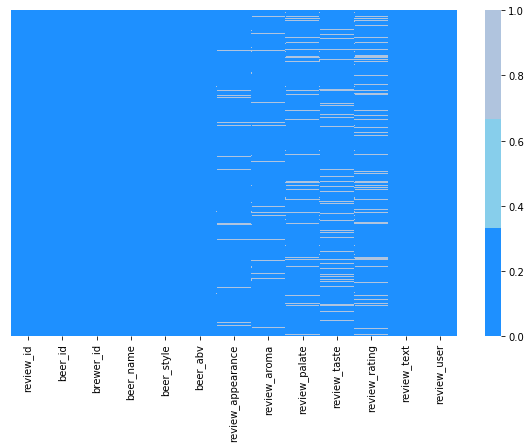

In [12]:
# Looking through a heat map
plt.figure(figsize = (10,6))
sea.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap=colors)

<b> The thin different blue lines represents missing values

### <b> Dealing with missing values

In [13]:
# Sum of total missing values per column
data.isnull().sum()

review_id               0
beer_id                 0
brewer_id               0
beer_name               0
beer_style              0
beer_abv                0
review_appearance    1509
review_aroma         1762
review_palate        2015
review_taste         2432
review_rating        3527
review_text             0
review_user             0
dtype: int64

In [14]:
data.dropna(inplace=True)

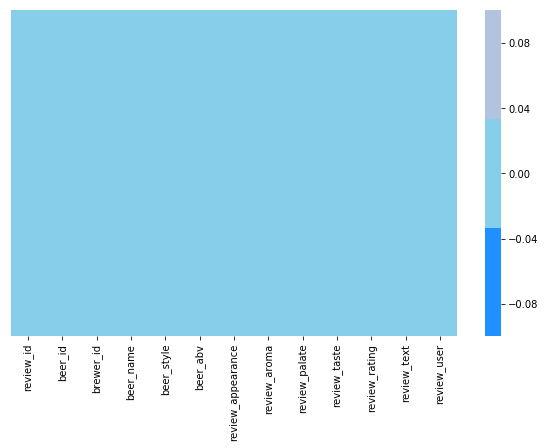

In [15]:
# Looking through a heat map
plt.figure(figsize = (10,6))
sea.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap=colors)

<b> Solid color indicates no missing values

### <b> Text Processing

In [16]:
def clean_text(text):
    # split into words by white space
    words = text.split()
    words = [w.lower() for w in words if w.isalpha()]
    words = [w for w in words if w not in stop_words]
    
    return ' '.join(words)

In [17]:
data[['beer_name', 'beer_style', 'review_text']].head()

,beer_name,beer_style,review_text
0,Pilsner Urquell,Czech Pilsener,First thing I noticed after pouring from green...
1,Black Sheep Ale (Special),English Pale Ale,A: pours an amber with a one finger head but o...
3,Founders Dirty Bastard,Scotch Ale / Wee Heavy,Poured from 12 oz. bottle into a Sam Adams per...
4,Founders Imperial Stout,Russian Imperial Stout,Bottle poured into a tulip.\t\tA - Pours jet b...
5,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,Kentucky Breakfast Stout is yet another outsta...


In [18]:
data['beer_name_c'] = [clean_text(line) for line in data['beer_name']]
data['beer_style_c'] = [clean_text(line) for line in data['beer_style']]
data['review_text_c'] = [clean_text(line) for line in data['review_text']]

# <b> Visualizing Data

In [19]:
import wordcloud
from wordcloud import WordCloud
from nltk import word_tokenize
'''
    Creates a word cloud based on words frequency of the text
    Input: text
    Return: wordcloud
'''
def word_cloud(text):
    word_join = ' '.join(text.tolist())
    frequency = nltk.FreqDist(word_tokenize(word_join))
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(frequency)
    return wordcloud

In [20]:
text_columns = data[['beer_name_c', 'beer_style_c', 'review_text_c']]
text_columns.head()

,beer_name_c,beer_style_c,review_text_c
0,pilsner urquell,czech pilsener,first thing noticed pouring green bottle glass...
1,black sheep ale,english pale ale,pours amber one finger head strong head recede...
3,founders dirty bastard,scotch ale wee heavy,poured bottle sam adams perfect pint deep dark...
4,founders imperial stout,russian imperial stout,bottle poured pours jet black dark rich head l...
5,founders kbs breakfast,american double imperial stout,kentucky breakfast stout yet another outstandi...


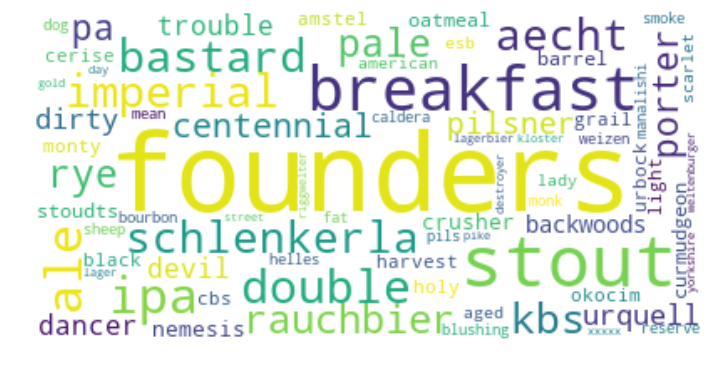

In [21]:
cloud_name  = word_cloud(text_columns['beer_name_c'])
plt.figure(figsize = (12,12))
plt.imshow(cloud_name, interpolation='bilinear')
plt.axis("off")
plt.show()

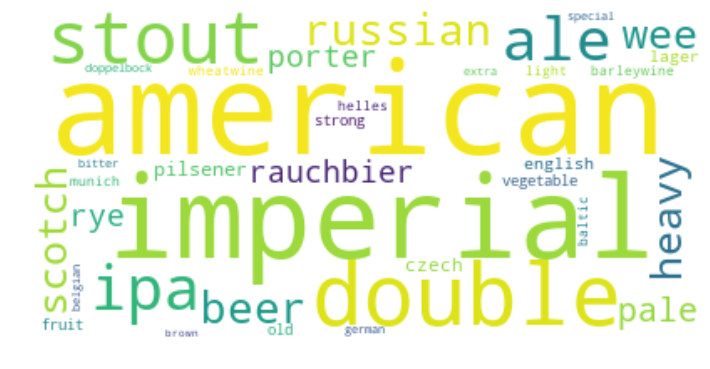

In [22]:
cloud_style  = word_cloud(text_columns['beer_style_c'])
plt.figure(figsize = (12,12))
plt.imshow(cloud_style, interpolation='bilinear')
plt.axis("off")
plt.show()

### <b> Styles

In [23]:
unique_styles = text_columns['beer_style_c'].unique()
df_unique_styles = pd.DataFrame(unique_styles, columns = ['Styles'])
df_unique_styles.head()

,Styles
0,czech pilsener
1,english pale ale
2,scotch ale wee heavy
3,russian imperial stout
4,american double imperial stout


In [24]:
print("Number of Unique Styles = ", len(df_unique_styles))

Number of Unique Styles =  24


### <b> Brewers
    

In [25]:
unique_brewer = data['brewer_id'].unique()
df_unique_beer = pd.DataFrame(unique_brewer, columns = ['Brewers'])
df_unique_beer.head()

,Brewers
0,1
1,1417
2,1199
3,1075
4,263


In [26]:
print("Number of Unique Brewers = ", len(df_unique_beer))

Number of Unique Brewers =  13


### <b> Beers
    

In [27]:
unique_beers = data['beer_id'].unique()
df_unique_beers = pd.DataFrame(unique_beers, columns = ['Beers'])
df_unique_beers.head()

,Beers
0,429
1,4904
2,7463
3,21822
4,19960


In [28]:
print("Number of Unique Beers = ", len(df_unique_beers))

Number of Unique Beers =  46


### <b> Users
    

In [29]:
unique_users = data['review_user'].unique()
df_unique_users = pd.DataFrame(unique_users, columns = ['Users'])
df_unique_users.head()

,Users
0,5803
1,535
2,1884
3,267
4,3060


In [30]:
print("Number of Unique Users = ", len(df_unique_users))

Number of Unique Users =  5439


### <b> Number of Rated Beers by Style

Text(0.5, 1.0, 'Number of Beers by Style')

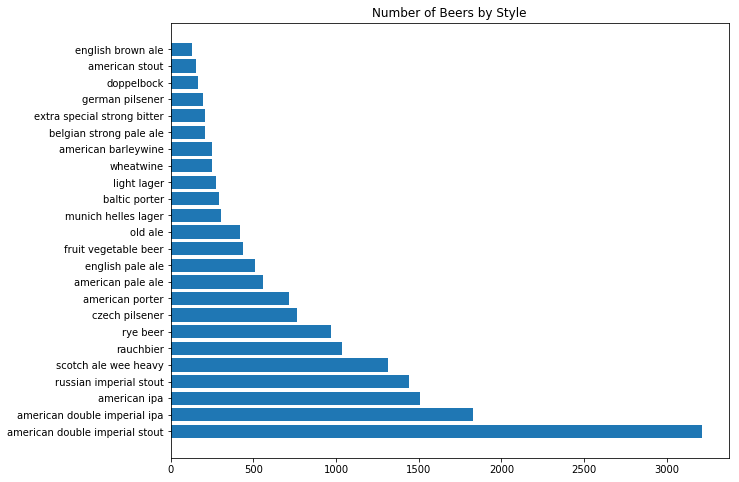

In [31]:
# DataFrame with Information
style = text_columns['beer_style_c'].value_counts()
s = pd.Series(style)
df_style = pd.DataFrame({'Style':s.index, 'Number':s.values})
df_style = df_style.set_index('Style')

plt.figure(figsize = (10,8))
plt.barh(y = s.index, width=s.values)
plt.title('Number of Beers by Style')

### <b> Mean Rating of Beers by Style

In [32]:
df_rating_style = pd.DataFrame(columns =['Ratings', 'Style'])
df_rating_style['Ratings'] = data['review_rating']
df_rating_style['Style'] = text_columns['beer_style_c']

In [33]:
df_rating_style.head()

,Ratings,Style
0,2.5,czech pilsener
1,3.0,english pale ale
3,4.5,scotch ale wee heavy
4,4.0,russian imperial stout
5,5.0,american double imperial stout


In [34]:
rating_style = df_rating_style.groupby(['Style'])['Ratings'].mean()

In [35]:
df_rating_style = pd.DataFrame(rating_style)
df_rating_style.head()

,Ratings
Style,
american barleywine,3.945565
american double imperial ipa,3.865847
american double imperial stout,4.344275
american ipa,4.138594
american pale ale,3.893750


### <b> Mean Rating of Beers by ABV

In [36]:
df_abv_style = pd.DataFrame(columns =['Ratings', 'ABV'])
df_abv_style['Ratings'] = data['review_rating']
df_abv_style['ABV'] = data['beer_abv']

In [37]:
df_abv_style.head()

,Ratings,ABV
0,2.5,4.4
1,3.0,4.4
3,4.5,8.5
4,4.0,10.5
5,5.0,11.2


In [38]:
abv_style = df_abv_style.groupby(['ABV'])['Ratings'].mean()

In [39]:
df_abv_style = pd.DataFrame(abv_style)
df_abv_style.head()

,Ratings
ABV,
3.5,2.759058
4.3,4.124260
4.4,3.843487
4.7,3.548437
5.0,3.911922


### <b> Which Brewer Produces the Strongest ABV?

In [40]:
# Identifies the higher value for the abv in the dataset unique in the first position
strong_abv = data['beer_abv'].sort_values(ascending=False).unique()[0]
print('Stronger ABV =', strong_abv)

Stronger ABV = 12.0


In [41]:
# Select the brewer id which produces the strons abv 
brewer_strong_abv = data[data['beer_abv'] == strong_abv]['brewer_id'].unique()
print('Brewer with stronger ABV =', brewer_strong_abv[0])

Brewer with stronger ABV = 1199


### <b> How many beers by brewer?

In [42]:
beer_count = data.groupby(['brewer_id'])['beer_id'].count()
df_beer_count = pd.DataFrame(beer_count)
df_beer_count.head()

,beer_id
brewer_id,
1,762
163,276
263,1205
365,154
394,1349


### <b> What kind of beer scores highest?

In [43]:
beer_high = data.groupby(['beer_id'])['review_rating'].count()
df_beer_high = pd.DataFrame(beer_high)
df_beer_high.head(10)

,review_rating
beer_id,
429,762
436,276
727,506
966,154
1018,189
1324,341
1504,292
1550,216
1622,210


### <b> Distribution by brewer

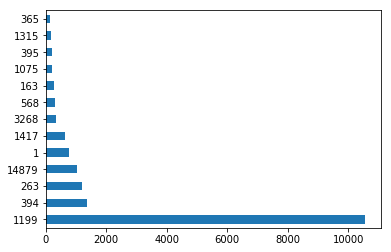

In [44]:
data['brewer_id'].value_counts().plot(kind = 'barh')

### <b> Reviews Distributions

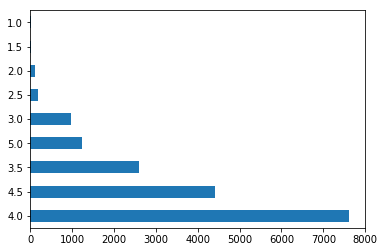

In [45]:
data['review_appearance'].value_counts().plot(kind = 'barh')

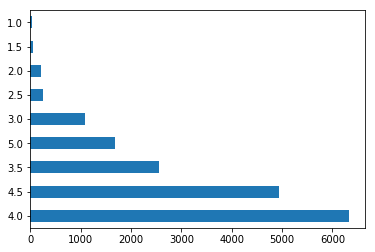

In [46]:
data['review_aroma'].value_counts().plot(kind = 'barh')

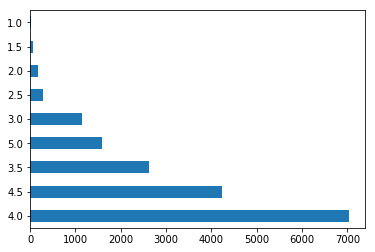

In [47]:
data['review_palate'].value_counts().plot(kind = 'barh')

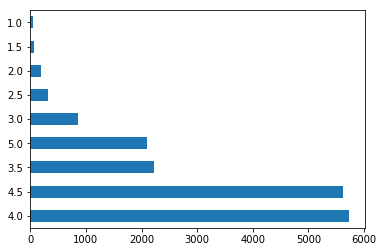

In [48]:
data['review_taste'].value_counts().plot(kind = 'barh')

# <b> Linear Regression

##### <b> Data Correlation

In [49]:
corr_data = data.corr() #test with correlated data

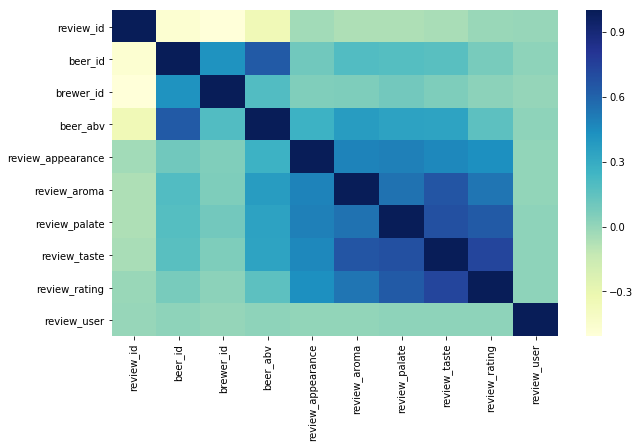

In [50]:
# Looking through a heat map
plt.figure(figsize = (10,6))
sea.heatmap(corr_data,yticklabels=True,cbar=True,cmap='YlGnBu')

##### <b> Organizing training data

In [51]:
# Values that means something intersting for the ML  (numeric data)
X = data[['review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'beer_abv']]
# Predicted value
target = data['review_rating']

# Split Data in Train and Test with 33%
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3)

In [52]:
# Linear Regression Model
model = LinearRegression()
# Adjusting the Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
# Making the Predictions
pred_lr = model.predict(X_test)
model_score_lr = model.score(X_test, y_test)
print(model_score_lr)

0.6036107501438827


# <b> Bag of Words 

In [54]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [55]:
# Values that means something intersting for the ML  (numeric data)
X = data['review_text_c']
y =  data['review_rating'].astype('str')

# Split Data in Train and Test with 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12009,), (5148,), (12009,), (5148,))

### <b>  Word Counts with CountVectorizer

In [57]:
# create the transform
count_vectorizer = CountVectorizer(max_features=5000)

#######################################
#### tokenize and build vocabulary ####
#######################################
# learn vocabulary and vectorize
X_train = count_vectorizer.fit_transform(X_train)
# only vectorizes
X_test = count_vectorizer.transform(X_test)
# vocabulary
vocab_c = count_vectorizer.vocabulary_

In [58]:
# Values that means something intersting for the ML  (numeric data)
X = data[['review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'beer_abv']]

In [59]:
# Predicted value
target = data['review_rating']

In [60]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 100, 
                             random_state = 42
                             )
clf = clf.fit(X_train, y_train)

In [61]:
# Making the Predictions
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

In [62]:
print(score)

0.31041181041181043


# <b> Neural Network and Embeddings

In [63]:
# Values that means something intersting for the ML  (numeric data)
X = data['review_text_c']
y =  data['review_rating'].astype('str')

# Split Data in Train and Test with 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
vocab_size = 10000
embedding_dim = 32
max_length = 32
trunc_type='post'
oov_tok = "<OOV>"

In [65]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

NameError: name 'Tokenizer' is not defined

In [ ]:
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_tok,maxlen=max_length, truncating=trunc_type)

X_test_tok = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_tok,maxlen=max_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(y.unique()), activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
num_epochs = 100
model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test))